In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [121]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [122]:
df=pd.read_csv('drive/MyDrive/lab4/Vietcombank.csv')
df
df1=df.reset_index()['Close']
df1.shape

(2043,)

In [123]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [124]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [125]:
print(train_data.shape)
print(test_data.shape)

(1634, 1)
(409, 1)


In [126]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [127]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [128]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)



(1533, 100)
(1533,)
(308, 100)
(308,)


In [129]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [130]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)

(1533, 100)
(1533,)
(308, 100)
(308,)


In [131]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [132]:
print(X_train.shape)
print(X_test.shape)

(1533, 100, 1)
(308, 100, 1)


In [133]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [134]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 4s 80ms/step - loss: 0.0381 - val_loss: 0.0099
Epoch 2/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 3/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
24/24 [==============================] - 2s 65ms/step - loss: 3.0080e-04 - val_loss: 3.7049e-04
Epoch 5/100
24/24 [==============================] - 1s 61ms/step - loss: 2.7727e-04 - val_loss: 3.5718e-04
Epoch 6/100
24/24 [==============================] - 2s 80ms/step - loss: 2.6098e-04 - val_loss: 3.5533e-04
Epoch 7/100
24/24 [==============================] - 2s 90ms/step - loss: 2.5130e-04 - val_loss: 3.2519e-04
Epoch 8/100
24/24 [==============================] - 2s 70ms/step - loss: 2.4624e-04 - val_loss: 3.4084e-04
Epoch 9/100
24/24 [==============================] - 1s 62ms/step - loss: 2.3968e-04 - val_loss: 3.4096e-04
Epoch 10/100
24/24 [==============================] 

In [135]:
X_test.shape

(308, 100, 1)

In [136]:
# 10. Dự báo dữ liệu test,
train_predict=model.predict(X_train)
y_pred=model.predict(test_data.reshape(test_data.shape[0],test_data.shape[1] , 1))


13/13 [==============================] - 0s 2ms/step


In [137]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [138]:
ytest=scaler.inverse_transform(test_data)
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(ytest - y_pred)/np.abs(ytest))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 15982.650505975977
Testing MAPE: 19.956432279332688
Testing MAE: 15772.399402124083


In [139]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

(1, 349)

In [141]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=349
i=0
while(i<30):

    if(len(temp_input)>349):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

(1, 349)
[0.93529195]
350
1 day input [0.48900152 0.49116085 0.50519647 0.49224053 0.49224053 0.51275413
 0.51383382 0.53218809 0.5311084  0.55162205 0.567817   0.55270169
 0.54622372 0.53326778 0.53326778 0.54190507 0.55702038 0.54406439
 0.57321534 0.56889669 0.567817   0.56889669 0.58401195 0.58401195
 0.567817   0.55162205 0.55162205 0.54622372 0.5473034  0.58617128
 0.61964091 0.63259685 0.62180019 0.67578342 0.67578342 0.62180019
 0.60560524 0.58941029 0.5926493  0.59372893 0.60236623 0.60884425
 0.6164019  0.61856118 0.61316289 0.61100352 0.60776461 0.61424253
 0.61208326 0.60992388 0.61208326 0.62180019 0.62935784 0.62180019
 0.64987144 0.65203081 0.66498675 0.66498675 0.69629702 0.70061566
 0.67686306 0.67362405 0.68442071 0.70061566 0.72328863 0.72976655
 0.76215655 0.76215655 0.72868692 0.75028025 0.72004962 0.73624457
 0.76215655 0.79454645 0.75135989 0.77511249 0.76215655 0.7783515
 0.76755484 0.75675817 0.76215655 0.75567853 0.76215655 0.77079385
 0.77511249 0.76215655 0.

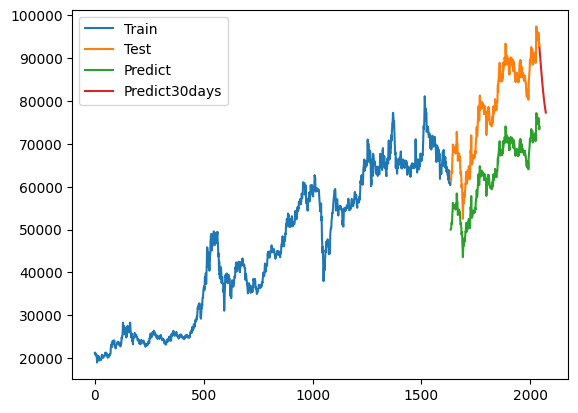

In [142]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

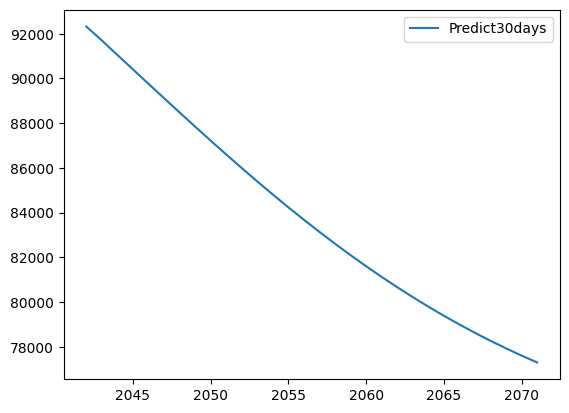

In [143]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict30days'])
plt.show()

In [144]:
print(scaler.inverse_transform(lst_output))

[[92325.18934291]
 [91702.85457563]
 [91052.50978877]
 [90407.58750236]
 [89762.43148748]
 [89119.36033053]
 [88480.09894761]
 [87846.22734316]
 [87219.30682333]
 [86600.83325033]
 [85992.15290012]
 [85394.52790644]
 [84809.09886421]
 [84236.86613126]
 [83678.75059776]
 [83135.54226593]
 [82607.94232118]
 [82096.49301355]
 [81601.68517281]
 [81123.86004255]
 [80663.31212061]
 [80220.20501694]
 [79794.62287378]
 [79386.55634199]
 [78995.9540013 ]
 [78622.62886895]
 [78266.4033113 ]
 [77926.97348134]
 [77604.04020663]
 [77297.20147421]]
